In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Train.csv')

df.head(10)



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [2]:
train_data=df.copy()

# Preprocessing of Train Data

In [3]:
train_data.shape

(8523, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train_data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [8]:
train_data.Item_Fat_Content.unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

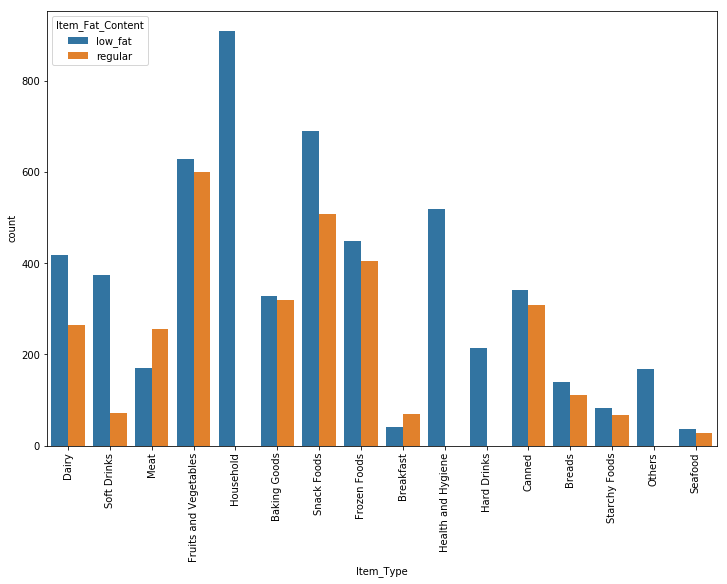

In [9]:
train_data["Item_Fat_Content"]=train_data["Item_Fat_Content"].map({"Low Fat":"low_fat","low fat":"low_fat","LF":"low_fat",
                                                                  "Regular":"regular","reg":"regular"})
plt.figure(figsize=(12,8))
sns.countplot(train_data["Item_Type"],hue="Item_Fat_Content",data=train_data)
plt.xticks(rotation=90)
plt.show()

# categorising low fat, LF , Low Fat as 'low_fat' and regular, reg as 'regular'

In [10]:
train_data.Item_Fat_Content.unique()

array(['low_fat', 'regular'], dtype=object)

In [11]:
train_data.Item_Fat_Content.value_counts()

low_fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

#######################################################

In [12]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low_fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low_fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Visualisation of Data

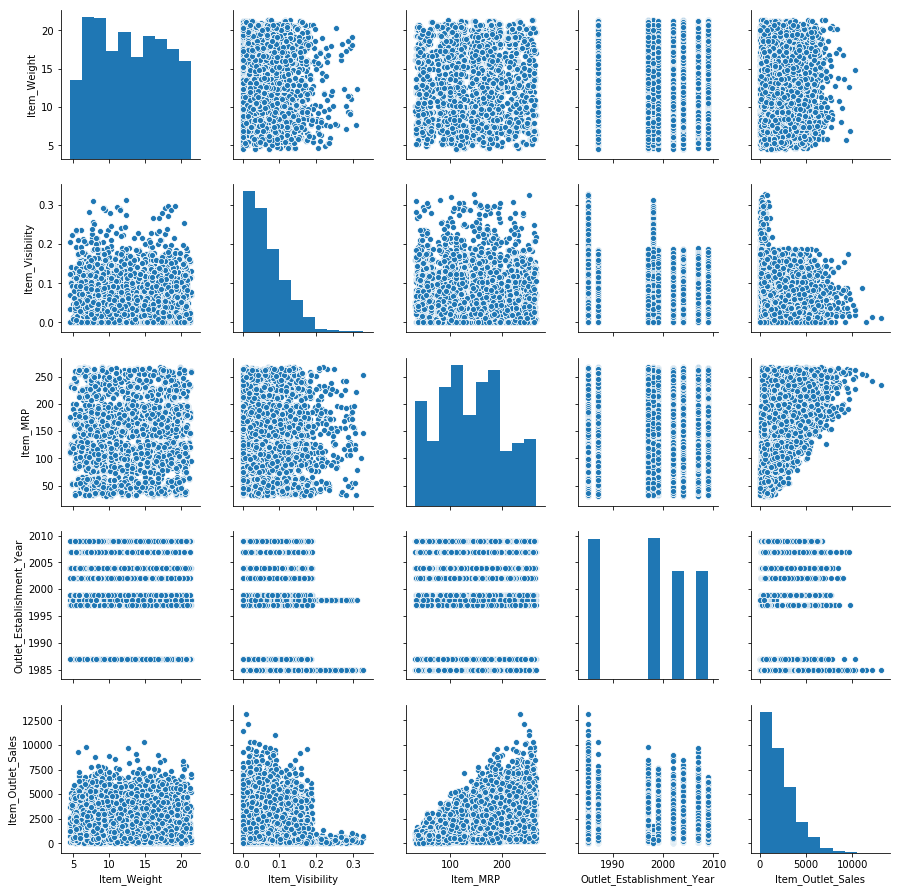

In [13]:
sns.pairplot(train_data)

# Lets see correlation b/w target and features

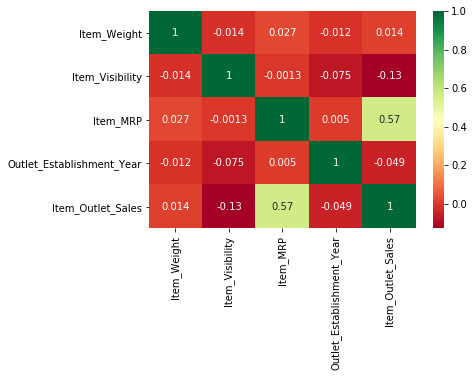

In [14]:
corr_matrix=train_data.corr()
corr_matrix['Item_Outlet_Sales']
sns.heatmap(corr_matrix, cmap = "RdYlGn", annot = True)

# ITEM_MRP seems to have a good correlation with targeted ITEM_OUTLET_SALES and other columns are not very useful for prediction of target value

# From above plots we can say that we can drop ITEM_VISIBILiTY along with ITEM_WEIGHT . Further more both of these column have very low correlation strength with target column

# For further data processing we need to convert column type into their correct type

In [15]:
train_data.Item_Identifier=train_data.Item_Identifier.astype('category')
train_data.Item_Fat_Content=train_data.Item_Fat_Content.astype('category')
train_data.Item_Type=train_data.Item_Type.astype('category')
train_data.Outlet_Identifier=train_data.Outlet_Identifier.astype('category')
train_data.Outlet_Establishment_Year=train_data.Outlet_Establishment_Year.astype('category')

train_data.Outlet_Type=train_data.Outlet_Type.astype('category')
train_data.Outlet_Location_Type=train_data.Outlet_Location_Type.astype('category')
train_data.Outlet_Size=train_data.Outlet_Size.astype('category')

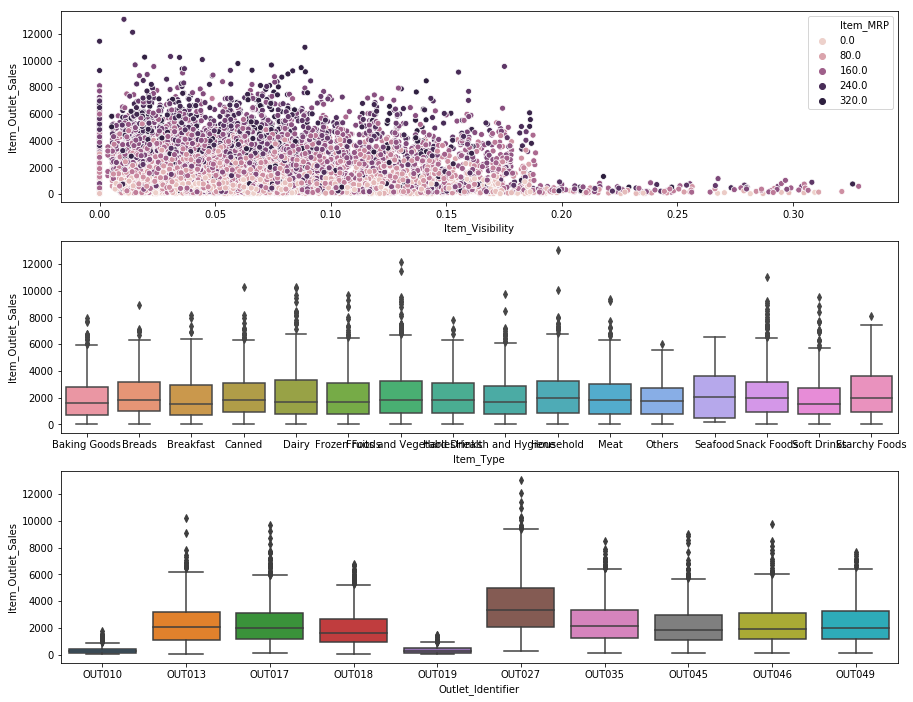

In [16]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=train_data)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=train_data)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=train_data)



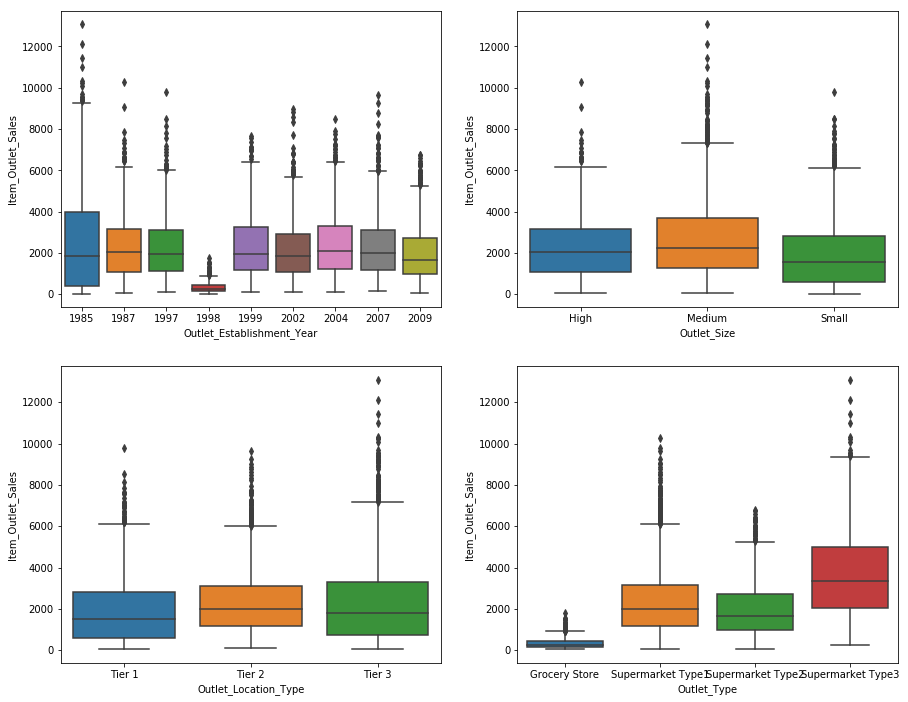

In [17]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=train_data)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=train_data)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=train_data)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=train_data)

# From above plots we can say that we can drop ITEM_VISIBILiTY along with ITEM_WEIGHT . Further more both of these column have very low correlation strength with target column.


# Therefore Columns for model training will be

In [18]:
attributes=['Item_Identifier','Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year'
            ,'Outlet_Identifier','Item_Type']

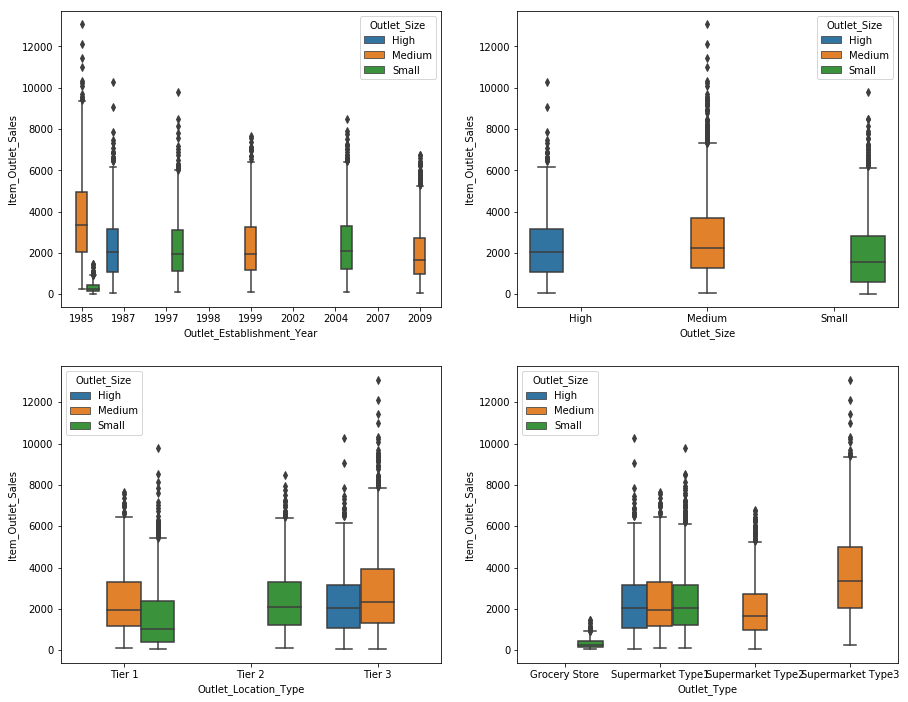

In [19]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=train_data)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=train_data)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=train_data)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=train_data)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null category
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null category
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null category
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null category
Outlet_Establishment_Year    8523 non-null category
Outlet_Size                  6113 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Type                  8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(8), float64(4)
memory usage: 395.5 KB


In [23]:
train_data.Outlet_Size.isnull().nunique()

2

# One thing to observe is when OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2 then outlet size is null furthermore when OUTLET_TYPE = Grocery store and OUTLET_LOCATION_TYPE is Tier 3 then outlet size is always null

In [247]:
train_data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

# Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. Tier 3 have 2-medium and 1 high and (missing 2) shop

# Tier 2 will have medium size shop in missing 1 and Tier 3 will be high or medium size shop

In [25]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size = 'Medium'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size = 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size = 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size = 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size = 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size = 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size = 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size = 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size =='Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size = 'Medium'
    return(x.Outlet_Size)


In [26]:
train_data.Outlet_Size=train_data.apply(func,axis=1)

In [27]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low_fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low_fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
for i in ['Item_Identifier']:
    x  = train_data[i].value_counts().to_dict()
    train_data[i] = train_data[i].map(x)
train_data.head()    

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,8,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,6,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,7,17.50,low_fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,6,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,6,8.93,low_fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
attributes=['Item_Identifier','Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year'
            ,'Outlet_Identifier','Item_Type','Item_Fat_Content']
new_train_data=pd.get_dummies(train_data[attributes])

# train_data.info()
new_train_data.info()


X=new_train_data.copy()
X.info()

new_train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 49 columns):
Item_Identifier                    8523 non-null int64
Item_MRP                           8523 non-null float64
Outlet_Type_Grocery Store          8523 non-null uint8
Outlet_Type_Supermarket Type1      8523 non-null uint8
Outlet_Type_Supermarket Type2      8523 non-null uint8
Outlet_Type_Supermarket Type3      8523 non-null uint8
Outlet_Location_Type_Tier 1        8523 non-null uint8
Outlet_Location_Type_Tier 2        8523 non-null uint8
Outlet_Location_Type_Tier 3        8523 non-null uint8
Outlet_Size_High                   8523 non-null uint8
Outlet_Size_Medium                 8523 non-null uint8
Outlet_Size_Small                  8523 non-null uint8
Outlet_Establishment_Year_1985     8523 non-null uint8
Outlet_Establishment_Year_1987     8523 non-null uint8
Outlet_Establishment_Year_1997     8523 non-null uint8
Outlet_Establishment_Year_1998     8523 non-null uint8
Outlet_Esta

,Item_Identifier,Item_MRP,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_low_fat,Item_Fat_Content_regular
0,8,249.8092,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,48.2692,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,7,141.6180,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,6,182.0950,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,6,53.8614,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0


In [35]:
X.isnull().sum()

Item_Identifier                    0
Item_MRP                           0
Outlet_Type_Grocery Store          0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
Outlet_Type_Supermarket Type3      0
Outlet_Location_Type_Tier 1        0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
Outlet_Size_High                   0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Establishment_Year_1985     0
Outlet_Establishment_Year_1987     0
Outlet_Establishment_Year_1997     0
Outlet_Establishment_Year_1998     0
Outlet_Establishment_Year_1999     0
Outlet_Establishment_Year_2002     0
Outlet_Establishment_Year_2004     0
Outlet_Establishment_Year_2007     0
Outlet_Establishment_Year_2009     0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
Outlet_Identifier_OUT027           0
O

# Now we are ready to apply ML algorithms

In [253]:
# Splitting train_data into training and validation data

y=train_data.Item_Outlet_Sales
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=0)
y_valid.head()
####################################################

#now we will use various ML model to fit the training data




4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
Name: Item_Outlet_Sales, dtype: float64

# Linear Regressor


In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
# from sklearn.metrics import score
model1=LinearRegression()
model1.fit(X_train,y_train)
predict1=model1.predict(X_valid)
print(mean_squared_error(predict1,y_valid))
print(mean_absolute_error(predict1,y_valid))
print(model1.score(X_train,y_train))
print(r2_score(predict1,y_valid))
print('-------')

rmse = sqrt(mean_squared_error(predict1,  y_valid))
print(rmse)


1331625.768730759
861.000201650025
0.5632873615210023
0.14401964971638215
-------
1153.9609043337468


# Decision Tree 

In [255]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(X_train,y_train)
predict2=model2.predict(X_valid)
print(mean_squared_error(predict2,y_valid))
print(mean_absolute_error(predict2,y_valid))
print(model1.score(X_train,y_train))
print(r2_score(predict2,y_valid))
print('-------')

rmse = sqrt(mean_squared_error(predict2,  y_valid))
print(rmse)
# model2.get_param()

2322163.375227903
1060.235855455612
0.5632873615210023
0.19346663357836402
-------
1523.864618405422


# Random Forest

In [256]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(n_estimators=300,random_state=0)
model3.fit(X_train,y_train)
predict3=model3.predict(X_valid)
print(mean_squared_error(predict3,y_valid))
print(mean_absolute_error(predict3,y_valid))
print(model3.score(X_train,y_train))
print(r2_score(predict3,y_valid))
print('-------')

rmse = sqrt(mean_squared_error(predict3,  y_valid))
print(rmse)

1355850.1652197202
818.8735351105435
0.9380429112350606
0.298138650617901
-------
1164.4097926502166


# XGBoost

In [257]:
from xgboost import XGBRegressor
model4=XGBRegressor(n_estimators=1000,learning_rate=0.1,random_state=72)
model4.fit(X_train,y_train,early_stopping_rounds=40,eval_set=[(X_valid,y_valid)],verbose=False)
predict4=model4.predict(X_valid)
print(mean_squared_error(predict4,y_valid))
print(mean_absolute_error(predict4,y_valid))
print(model4.score(X_train,y_train))
print(r2_score(predict4,y_valid))
print('-------')

rmse = sqrt(mean_squared_error(predict4,  y_valid))
print(rmse)

1249195.5179858652
783.4684386393834
0.6683931600254349
0.2623265409031582
-------
1117.674155550653


# Gradient Boosting Regressor

In [258]:
from sklearn.ensemble import  GradientBoostingRegressor
gbm= GradientBoostingRegressor()
gbm.fit(X_train, y_train)
preds= gbm.predict(X_valid)
print(mean_squared_error(preds,y_valid))
print(mean_absolute_error(preds,y_valid))
print(gbm.score(X_train,y_train))
print(r2_score(preds,y_valid))
print('-------')

rmse = sqrt(mean_squared_error(preds,  y_valid))
print(rmse)
# gbm.fit(X,y)

1222918.0806654803
780.0942760888366
0.640550941058831
0.2932559004473696
-------
1105.8562658254825


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

# From all the above results we come to conclusion that Gradient Boosting fits best on this training dataset

# Now we will try to tune its Hyperparameters and Obtain a final model for prediction on Test Data

In [202]:
# Gradient Boosting
from sklearn.model_selection import GridSearchCV


In [314]:
gbr1=GradientBoostingRegressor(n_estimators=1000,random_state=100,learning_rate=0.05)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18],'max_depth':[6,7,8]}]
gs=GridSearchCV(gbr1,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samp...e=100, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'min_samples_split': [5, 9, 13], 'max_leaf_nodes': [3, 5, 7, 9], 'max_features': [8, 10, 15, 18], 'max_depth': [6, 7, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [315]:
gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=6, max_features=15,
             max_leaf_nodes=3, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=100, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [316]:
gbr1=gs.best_estimator_

In [318]:
gbr1.fit(X,y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=6, max_features=15,
             max_leaf_nodes=3, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=100, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

# Final Parameters of Gradient Boosting

In [338]:
gbr_final=GradientBoostingRegressor(criterion='friedman_mse',
             learning_rate=0.1, loss='ls', max_depth=7, max_features=8,
             max_leaf_nodes=3,min_samples_leaf=1,
             min_samples_split=5,
             n_estimators=1000,
             random_state=100, verbose=0)
gbr_final.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=8,
             max_leaf_nodes=3, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=100, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

# Test Data Preprocessing

In [339]:
df_test=pd.read_csv('Test.csv')

In [340]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [341]:
attributes1=['Item_Identifier','Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year'
            ,'Outlet_Identifier','Item_Type','Item_Fat_Content']
test=df_test[attributes1]
test.head()

,Item_Identifier,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Fat_Content
0,FDW58,107.8622,Supermarket Type1,Tier 1,Medium,1999,OUT049,Snack Foods,Low Fat
1,FDW14,87.3198,Supermarket Type1,Tier 2,NaN,2007,OUT017,Dairy,reg
2,NCN55,241.7538,Grocery Store,Tier 3,NaN,1998,OUT010,Others,Low Fat
3,FDQ58,155.0340,Supermarket Type1,Tier 2,NaN,2007,OUT017,Snack Foods,Low Fat
4,FDY38,234.2300,Supermarket Type3,Tier 3,Medium,1985,OUT027,Dairy,Regular


In [342]:
test.isnull().sum()

Item_Identifier                 0
Item_MRP                        0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Size                  1606
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_Type                       0
Item_Fat_Content                0
dtype: int64

In [343]:
test.Item_Identifier=test.Item_Identifier.astype('category')
test.Item_Fat_Content=test.Item_Fat_Content.astype('category')
test.Item_Type=test.Item_Type.astype('category')
test.Outlet_Identifier=test.Outlet_Identifier.astype('category')
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('int64')

test.Outlet_Type=test.Outlet_Type.astype('category')
test.Outlet_Location_Type=test.Outlet_Location_Type.astype('category')
test.Outlet_Size=test.Outlet_Size.astype('category')
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('category')

In [344]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size = 'Medium'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size = 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size = 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size = 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size = 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size = 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size = 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size = 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size =='Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size = 'Medium'
    return(x.Outlet_Size)

In [345]:
test.Outlet_Size=test.apply(func,axis=1)

In [346]:
test.isnull().sum()

Item_Identifier              0
Item_MRP                     0
Outlet_Type                  0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Item_Type                    0
Item_Fat_Content             0
dtype: int64

In [347]:
for i in ['Item_Identifier']:
    x  = test[i].value_counts().to_dict()
    test[i] = test[i].map(x)
test.head()

,Item_Identifier,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Fat_Content
0,7,107.8622,Supermarket Type1,Tier 1,Medium,1999,OUT049,Snack Foods,Low Fat
1,6,87.3198,Supermarket Type1,Tier 2,Medium,2007,OUT017,Dairy,reg
2,4,241.7538,Grocery Store,Tier 3,Medium,1998,OUT010,Others,Low Fat
3,3,155.0340,Supermarket Type1,Tier 2,Medium,2007,OUT017,Snack Foods,Low Fat
4,4,234.2300,Supermarket Type3,Tier 3,Medium,1985,OUT027,Dairy,Regular


In [348]:
test["Item_Fat_Content"]=test["Item_Fat_Content"].map({"Low Fat":"low_fat","low fat":"low_fat","LF":"low_fat",
                                                                  "Regular":"regular","reg":"regular"})
test.Item_Fat_Content.unique()

array(['low_fat', 'regular'], dtype=object)

In [349]:
test.head()

,Item_Identifier,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Fat_Content
0,7,107.8622,Supermarket Type1,Tier 1,Medium,1999,OUT049,Snack Foods,low_fat
1,6,87.3198,Supermarket Type1,Tier 2,Medium,2007,OUT017,Dairy,regular
2,4,241.7538,Grocery Store,Tier 3,Medium,1998,OUT010,Others,low_fat
3,3,155.0340,Supermarket Type1,Tier 2,Medium,2007,OUT017,Snack Foods,low_fat
4,4,234.2300,Supermarket Type3,Tier 3,Medium,1985,OUT027,Dairy,regular


In [350]:
X_test=pd.get_dummies(test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 49 columns):
Item_Identifier                    5681 non-null int64
Item_MRP                           5681 non-null float64
Outlet_Type_Grocery Store          5681 non-null uint8
Outlet_Type_Supermarket Type1      5681 non-null uint8
Outlet_Type_Supermarket Type2      5681 non-null uint8
Outlet_Type_Supermarket Type3      5681 non-null uint8
Outlet_Location_Type_Tier 1        5681 non-null uint8
Outlet_Location_Type_Tier 2        5681 non-null uint8
Outlet_Location_Type_Tier 3        5681 non-null uint8
Outlet_Size_High                   5681 non-null uint8
Outlet_Size_Medium                 5681 non-null uint8
Outlet_Size_Small                  5681 non-null uint8
Outlet_Establishment_Year_1985     5681 non-null uint8
Outlet_Establishment_Year_1987     5681 non-null uint8
Outlet_Establishment_Year_1997     5681 non-null uint8
Outlet_Establishment_Year_1998     5681 non-null uint8
Outlet_Esta

# Predicting the final model on Test Data

In [354]:

predictions = gbr1.predict(X_test)
final = pd.DataFrame({"Item_Identifier":df_test["Item_Identifier"],"Outlet_Identifier":df_test["Outlet_Identifier"],"Item_Outlet_Sales":abs(predictions)})


In [355]:
final.to_csv('Final_Submission.csv',index=None)
final.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1703.303490
1,FDW14,OUT017,1418.365705
2,NCN55,OUT010,744.735674
3,FDQ58,OUT017,2500.087066
4,FDY38,OUT027,5768.314567
5,FDH56,OUT046,1821.001418
6,FDL48,OUT018,808.844385
7,FDC48,OUT027,2208.285093
8,FDN33,OUT045,1495.895578
9,FDA36,OUT017,3197.705543


# checking data with result file

In [356]:
result=pd.read_csv('Submission.csv',index_col=0)
result.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1636.244023
1,FDW14,OUT017,1409.355910
2,NCN55,OUT010,710.594286
3,FDQ58,OUT017,2355.184955
4,FDY38,OUT027,5857.916205
5,FDH56,OUT046,1853.228827
6,FDL48,OUT018,733.598282
7,FDC48,OUT027,2273.425151
8,FDN33,OUT045,1499.740111
9,FDA36,OUT017,3203.582302


In [357]:
a=final.groupby('Outlet_Identifier').get_group('OUT010')
b=result.groupby('Outlet_Identifier').get_group('OUT010')

In [358]:
print(a.head(),"-------------------------",b.head())

   Item_Identifier Outlet_Identifier  Item_Outlet_Sales
2            NCN55            OUT010         744.735674
19           FDA46            OUT010         498.736587
25           FDX22            OUT010         751.917413
37           FDD48            OUT010         257.930579
41           FDY19            OUT010         267.597063 -------------------------    Item_Identifier Outlet_Identifier  Item_Outlet_Sales
2            NCN55            OUT010         710.594286
19           FDA46            OUT010         562.242763
25           FDX22            OUT010         580.646243
37           FDD48            OUT010         341.566084
41           FDY19            OUT010         341.869598
